<a href="https://colab.research.google.com/github/AnaghaWani/BESem8/blob/main/DL/dl4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.decomposition import PCA
df = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
df.shape

(1258, 6)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [139]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [140]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [141]:
print(df['Volume'].head(10))  # show first 10 rows
print(df['Volume'].dtype)    # show the data type


0     7,380,500
1     5,749,400
2     6,590,300
3     5,405,900
4    11,688,800
5     8,824,000
6     4,817,800
7     3,764,400
8     4,631,800
9     3,832,800
Name: Volume, dtype: object
object


Text(0, 0.5, 'stock prices')

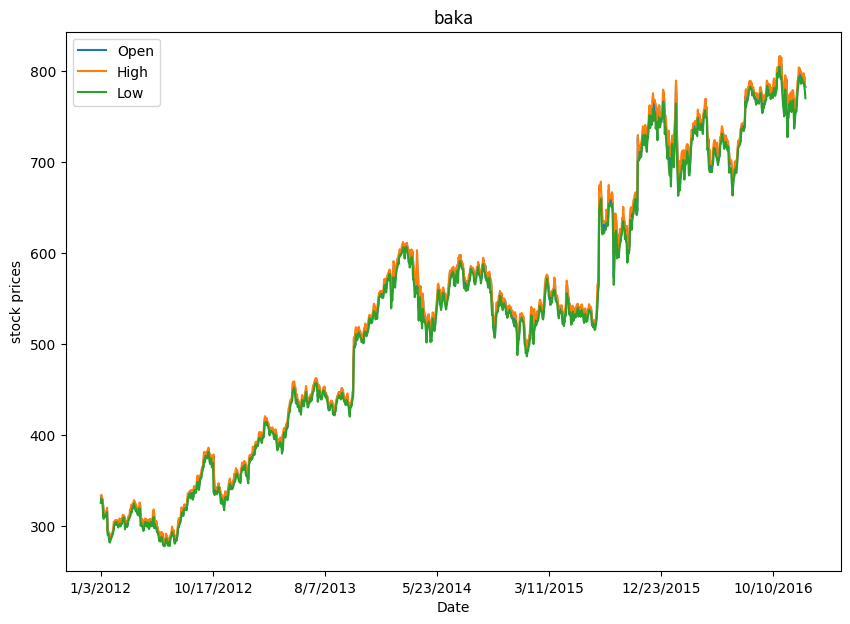

In [142]:
import matplotlib.pyplot as plt
ax1=df.plot(x='Date',y=['Open','High','Low','Close'],figsize=(10,7),title='baka')
ax1.set_ylabel('stock prices')

In [143]:
# Clean Volume: remove commas, convert to number
df['Volume'] = df['Volume'].astype(str).str.replace(',', '', regex=False)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Volume'])


Text(0, 0.5, 'stock volume')

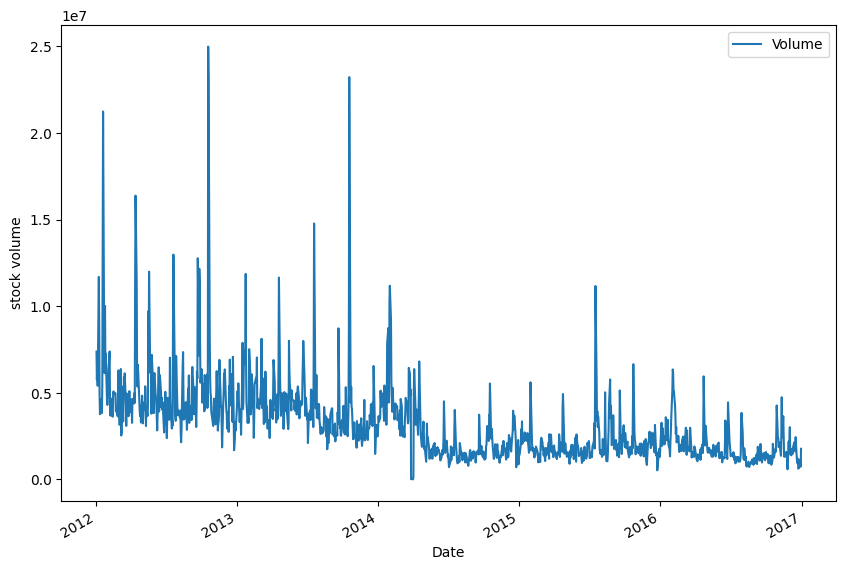

In [144]:
ax2 = df.plot(x='Date', y='Volume', figsize=(10,7))
ax2.set_ylabel('stock volume')

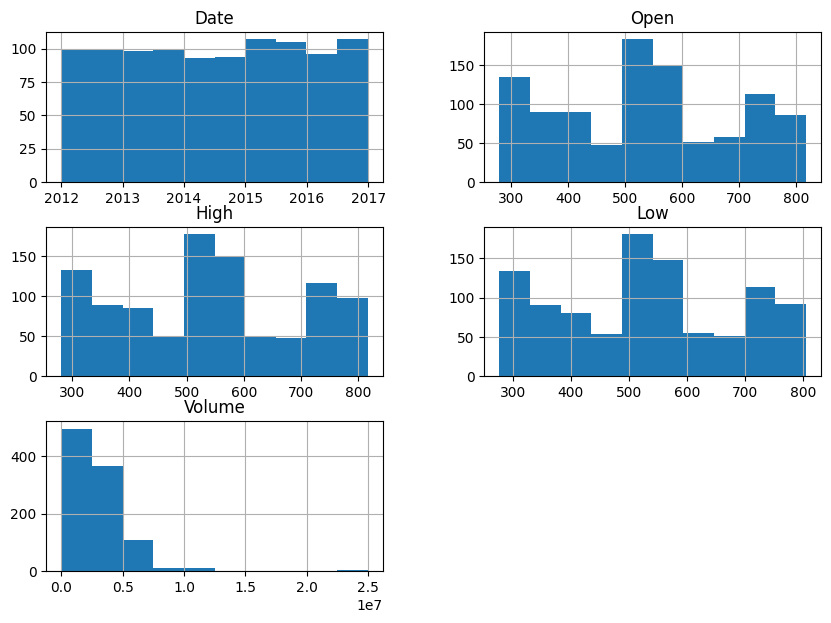

In [145]:
df.sample(1000).hist(figsize=(10,7))
plt.show()

In [146]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
data_without_date=df.drop('Date',axis=1)
data_without_date = data_without_date.replace({',': ''}, regex=True).astype(float)
scaled_data=pd.DataFrame(mms.fit_transform(data_without_date))

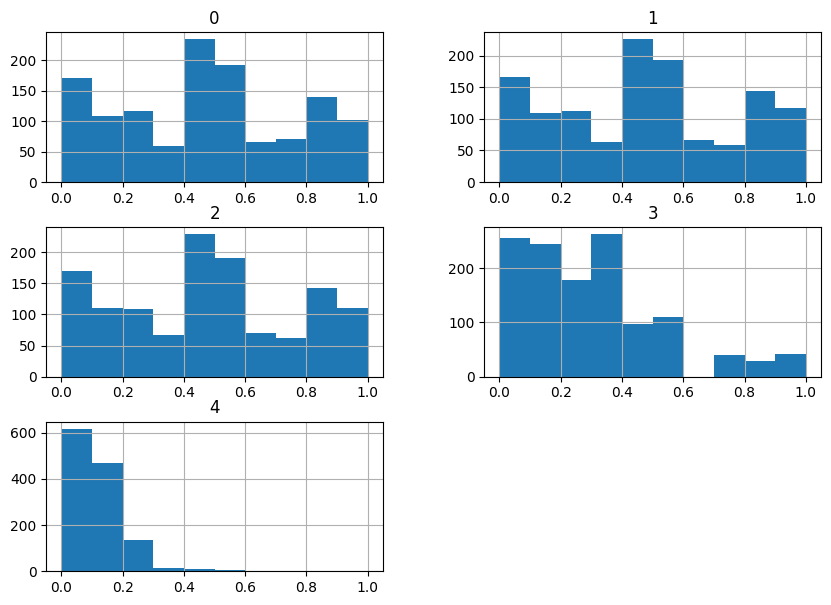

In [147]:
scaled_data.hist(figsize=(10,7))
plt.show()

In [148]:
scaled_data=scaled_data.drop([0,2,3],axis=1)
scaled_data

,1,4
0,0.096401,0.295258
1,0.098344,0.229936
2,0.092517,0.263612
3,0.088819,0.216179
4,0.076718,0.467797
...,...,...
1253,0.955292,0.024650
1254,0.964853,0.031286
1255,0.958074,0.045891
1256,0.942574,0.029491


In [149]:
def split_seq_multivariate(sequence, n_past, n_future):
    x = []
    y = []
    for window_start in range(len(sequence)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(sequence):
            break
        # Use .iloc for integer-location based indexing in pandas DataFrame
        past = sequence.iloc[window_start:past_end, :].values # Convert to NumPy array
        future = sequence.iloc[past_end:future_end, -1].values # Convert to NumPy array
        x.append(past)
        y.append(future)
    return np.array(x), np.array(y)

In [150]:
n_steps=60

In [151]:
print(scaled_data.shape)
print(scaled_data.head())


(1258, 2)
          1         4
0  0.096401  0.295258
1  0.098344  0.229936
2  0.092517  0.263612
3  0.088819  0.216179
4  0.076718  0.467797


In [152]:
x, y = split_seq_multivariate(scaled_data, n_steps, 1)

In [153]:
x.shape, y.shape

((1198, 60, 2), (1198, 1))

In [154]:
y=y[:,0]
y.shape

(1198,)

In [155]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,train_size=0.2,random_state=42)

In [156]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(612, input_shape=(n_steps, 2)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [157]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 612)            │     1,505,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        30,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,540,281 (5.88 MB)

 Trainable params: 1,540,281 (5.88 MB)

 Non-trainable params: 0 (0.00 B)

In [158]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [159]:
history = model.fit(trainx,trainy, epochs=15, batch_size=32, verbose=2, validation_data=(testx,testy))

Epoch 1/15
8/8 - 17s - 2s/step - loss: 0.0119 - mae: 0.0765 - val_loss: 0.0098 - val_mae: 0.0655
Epoch 2/15
8/8 - 25s - 3s/step - loss: 0.0081 - mae: 0.0527 - val_loss: 0.0048 - val_mae: 0.0394
Epoch 3/15
8/8 - 16s - 2s/step - loss: 0.0051 - mae: 0.0386 - val_loss: 0.0054 - val_mae: 0.0399
Epoch 4/15
8/8 - 24s - 3s/step - loss: 0.0049 - mae: 0.0362 - val_loss: 0.0049 - val_mae: 0.0470
Epoch 5/15
8/8 - 16s - 2s/step - loss: 0.0048 - mae: 0.0390 - val_loss: 0.0053 - val_mae: 0.0392
Epoch 6/15
8/8 - 25s - 3s/step - loss: 0.0048 - mae: 0.0372 - val_loss: 0.0046 - val_mae: 0.0431
Epoch 7/15
8/8 - 16s - 2s/step - loss: 0.0046 - mae: 0.0355 - val_loss: 0.0046 - val_mae: 0.0372
Epoch 8/15
8/8 - 22s - 3s/step - loss: 0.0044 - mae: 0.0343 - val_loss: 0.0044 - val_mae: 0.0403
Epoch 9/15
8/8 - 15s - 2s/step - loss: 0.0042 - mae: 0.0349 - val_loss: 0.0047 - val_mae: 0.0369
Epoch 10/15
8/8 - 17s - 2s/step - loss: 0.0045 - mae: 0.0351 - val_loss: 0.0043 - val_mae: 0.0393
Epoch 11/15
8/8 - 24s - 3s/st

In [160]:
model.evaluate(testx,testy)

30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - loss: 0.0047 - mae: 0.0360


[0.004259356297552586, 0.03539237752556801]

In [161]:
pred=model.predict(testx)

30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step


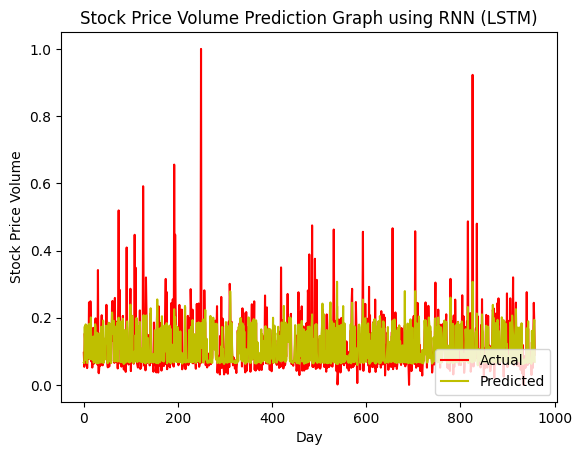

<Figure size 1000x700 with 0 Axes>

In [162]:
plt.plot(testy, c = 'r')
plt.plot(pred, c = 'y')
plt.xlabel('Day')
plt.ylabel('Stock Price Volume')
plt.title('Stock Price Volume Prediction Graph using RNN (LSTM)')
plt.legend(['Actual','Predicted'], loc = 'lower right')
plt.figure(figsize=(10,7))
plt.show()

In [164]:
# Evaluate the model and get MSE and MAE
loss, mae = model.evaluate(testx, testy, verbose=0)
print('MSE:', loss)
print('MAE:', mae)

# Calculate RMSE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(testy, pred))
print('RMSE:', rmse)

# Calculate R-squared
r2 = r2_score(testy, pred)
print('R-squared:', r2)


MSE: 0.004259356297552586
MAE: 0.03539237752556801
RMSE: 0.06526374318522837
R-squared: 0.4378588123760043
